
# LAB 6 - PCA Lab - Dimensionality Reduction using NumPy

This notebook demonstrates how Principal Component Analysis (PCA) works using only NumPy. You will learn to reduce dimensions and visualize data using PCA.



## 🔍 What is Data Reduction?

Data reduction refers to the process of reducing the amount of data that needs to be processed and stored, while preserving the essential patterns in the data.

### Why do we reduce data?
- To reduce computational cost.
- To remove noise and redundant features.
- To improve model performance and training time.
- To visualize high-dimensional data in 2D or 3D.

Common data reduction techniques include:
- Principal Component Analysis (PCA)
- Feature selection
- Sampling



## 📉 What is Principal Component Analysis (PCA)?

PCA is a **dimensionality reduction technique** that transforms a dataset into a new coordinate system. It identifies the **directions (principal components)** where the variance of the data is maximized.

### Key Concepts:
- **Principal Components**: New features (linear combinations of original features) capturing most variance.
- **Eigenvectors & Eigenvalues**: Used to compute these principal directions.
- **Covariance Matrix**: Measures how features vary with each other.

PCA helps in **visualizing high-dimensional data**, **noise reduction**, and **speeding up algorithms**.



## 🧠 NumPy Functions Summary for PCA

| Function | Purpose |
|---------|---------|
| `np.mean(X, axis=0)` | Compute mean of each column (feature-wise mean). |
| `X - np.mean(X, axis=0)` | Centering the data (zero mean). |
| `np.cov(X, rowvar=False)` | Compute covariance matrix for features. |
| `np.linalg.eigh(cov_mat)` | Get eigenvalues and eigenvectors (for symmetric matrices). |
| `np.argsort(values)[::-1]` | Sort values in descending order. |
| `np.dot(X, eigenvectors)` | Project original data onto new axes. |


In [1]:
# Step 1: Load the Iris Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
iris = pd.read_csv("iris.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [18]:
X=iris.drop(columns="species")
y = iris['species'].map({
    'setosa': 0,
    'versicolor': 1,
    'virginica': 2
})

In [19]:
print("Original shape:", X.shape)

Original shape: (150, 4)


In [20]:

# Step 2: Standardize the data (zero mean)
X_meaned = X - np.mean(X, axis=0)
print("Data after centering (first 5 rows):\n", X_meaned[:5])


Data after centering (first 5 rows):
    sepal_length  sepal_width  petal_length  petal_width
0     -0.743333     0.442667        -2.358    -0.999333
1     -0.943333    -0.057333        -2.358    -0.999333
2     -1.143333     0.142667        -2.458    -0.999333
3     -1.243333     0.042667        -2.258    -0.999333
4     -0.843333     0.542667        -2.358    -0.999333


In [21]:

# Step 3: Compute the Covariance Matrix
cov_mat = np.cov(X_meaned, rowvar=False)
print("Covariance matrix shape:", cov_mat.shape)


Covariance matrix shape: (4, 4)


In [22]:
print(cov_mat)

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


In [23]:

# Step 4: Compute Eigenvalues and Eigenvectors
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

print("Eigenvalues:\n", eigen_values)
print("Eigenvectors (first 2):\n", eigen_vectors[:, :2])


Eigenvalues:
 [0.02383509 0.0782095  0.24267075 4.22824171]
Eigenvectors (first 2):
 [[ 0.31548719  0.58202985]
 [-0.3197231  -0.59791083]
 [-0.47983899 -0.07623608]
 [ 0.75365743 -0.54583143]]


In [24]:
eigen_vectors

array([[ 0.31548719,  0.58202985,  0.65658877, -0.36138659],
       [-0.3197231 , -0.59791083,  0.73016143,  0.08452251],
       [-0.47983899, -0.07623608, -0.17337266, -0.85667061],
       [ 0.75365743, -0.54583143, -0.07548102, -0.3582892 ]])

In [25]:

# Step 5: Sort eigenvalues and eigenvectors in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]

print(sorted_index)
print(sorted_eigenvalues)
print(sorted_eigenvectors)


[3 2 1 0]
[4.22824171 0.24267075 0.0782095  0.02383509]
[[-0.36138659  0.65658877  0.58202985  0.31548719]
 [ 0.08452251  0.73016143 -0.59791083 -0.3197231 ]
 [-0.85667061 -0.17337266 -0.07623608 -0.47983899]
 [-0.3582892  -0.07548102 -0.54583143  0.75365743]]


In [26]:

# Step 6: Select the top k eigenvectors (top 2)
k = 2
eigenvector_subset = sorted_eigenvectors[:, 0:k]
print(eigenvector_subset)


[[-0.36138659  0.65658877]
 [ 0.08452251  0.73016143]
 [-0.85667061 -0.17337266]
 [-0.3582892  -0.07548102]]


In [27]:

# Step 7: Project the data onto the top k eigenvectors
X_reduced = np.dot(X_meaned, eigenvector_subset)
print("Reduced data shape:", X_reduced.shape)


Reduced data shape: (150, 2)


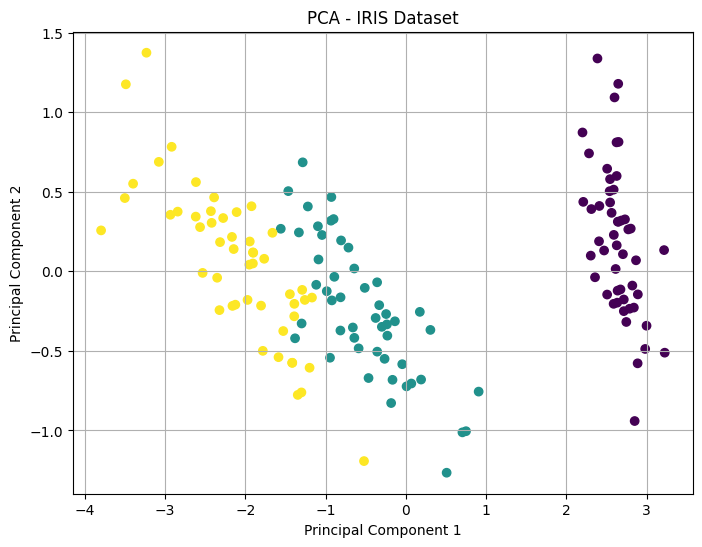

In [34]:

# Step 8: Plot the PCA-Reduced Data
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - IRIS Dataset')
plt.grid(True)
plt.show()


# 5,10,11,13,15,35,50,55,72,92,204,215.
Partition them into three bins by each of the following methods:
(a) equal-frequency (equal-depth) partitioning
(b) equal-width partitioning

In [9]:
import numpy as np

# Given data
data = [5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 215]
data.sort()  # Sort the data

print("Sorted Data:", data)

# (a) Equal-Frequency (Equal-Depth)
n = len(data)
k = 3  # number of bins
size = n // k

print("\n(a) Equal-Frequency Bins:")
for i in range(0, n, size):
    bin_data = data[i:i+size]
    print(f"Bin {i//size + 1}:", bin_data)

# (b) Equal-Width Partitioning
min_val = min(data)
max_val = max(data)
width = (max_val - min_val) / k

print("\n(b) Equal-Width Bins:")
bins = [[] for _ in range(k)]

for val in data:
    index = int((val - min_val) / width)
    if index == k:  # include max in the last bin
        index = k - 1
    bins[index].append(val)

for i, b in enumerate(bins):
    print(f"Bin {i + 1}:", b)


Sorted Data: [5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 215]

(a) Equal-Frequency Bins:
Bin 1: [5, 10, 11, 13]
Bin 2: [15, 35, 50, 55]
Bin 3: [72, 92, 204, 215]

(b) Equal-Width Bins:
Bin 1: [5, 10, 11, 13, 15, 35, 50, 55, 72]
Bin 2: [92]
Bin 3: [204, 215]
